In [3]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import metrics
%matplotlib inline

In [4]:
df = pd.read_csv(os.path.join(os.getcwd(), 'data', 'titanic.csv'))

In [5]:
#columns
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.drop("Cabin", axis=1, inplace=True) #lot of null

In [9]:
# adding mode in null age

mode_age = df.Age.mode().values[0]

In [10]:
df['Age'].fillna(mode_age, inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [12]:
print(df['Age'].isnull().sum())

0


In [13]:
#droping all null
df = df.dropna()

In [14]:
# check the class distribution
df.Survived.value_counts()/len(df)

Survived
0    0.617548
1    0.382452
Name: count, dtype: float64

In [15]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [16]:
col_to_consider = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked']

df_res = df[col_to_consider]

In [17]:
df_res.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [18]:
df_res.Sex.unique()

array(['male', 'female'], dtype=object)

In [19]:
df_res.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [20]:
#lets do lable encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [21]:
df_res.Sex = le.fit_transform(df_res.Sex)

C:\Users\Shubham_Rawat1\AppData\Local\Temp\ipykernel_26000\212766178.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_res.Sex = le.fit_transform(df_res.Sex)


In [22]:
le.inverse_transform([0,1])

array(['female', 'male'], dtype=object)

In [23]:
df_res.Embarked = le.fit_transform(df_res.Embarked)

C:\Users\Shubham_Rawat1\AppData\Local\Temp\ipykernel_26000\1569019399.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_res.Embarked = le.fit_transform(df_res.Embarked)


In [24]:
df_res.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [25]:
# check the encoding values

le.inverse_transform([0,1,2])

array(['C', 'Q', 'S'], dtype=object)

C:\Users\Shubham_Rawat1\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


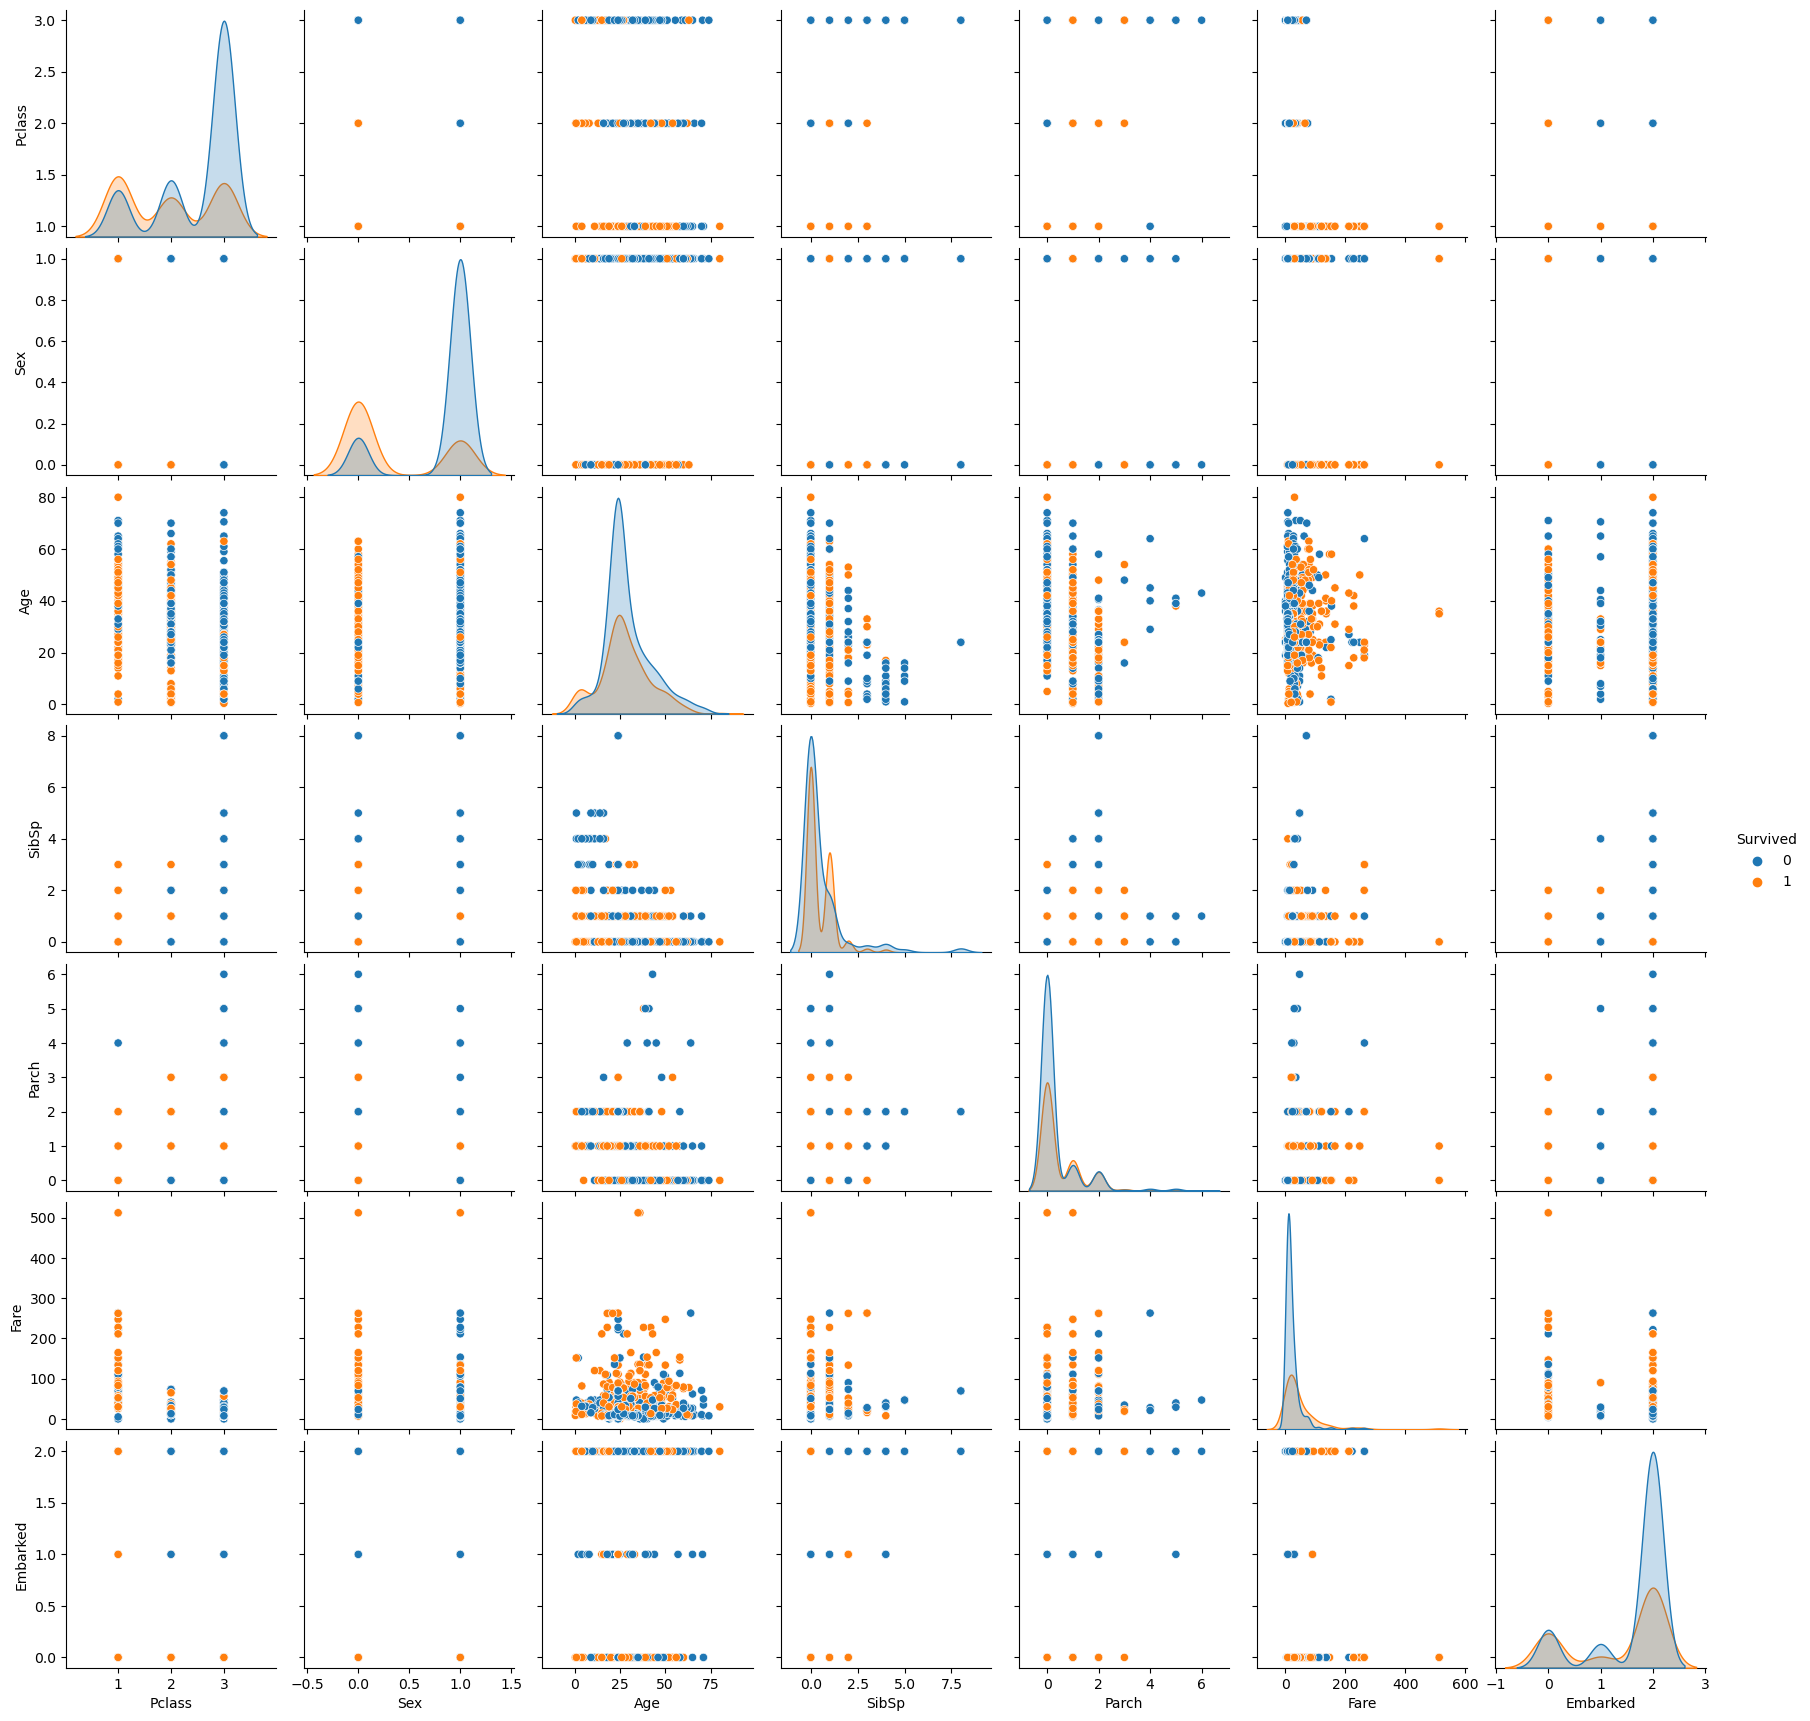

In [26]:
sns.pairplot(df_res,hue='Survived')

In [27]:
# check the corealation with data

df_res.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.335549,-0.541585,-0.057833,-0.034040,0.083151,0.255290,-0.169718
Pclass,-0.335549,1.000000,0.127741,-0.352812,0.081656,0.016824,-0.548193,0.164681
Sex,-0.541585,0.127741,1.000000,0.078802,-0.116348,-0.247508,-0.179958,0.110320
Age,-0.057833,-0.352812,0.078802,1.000000,-0.231639,-0.154027,0.104553,-0.002171
SibSp,-0.034040,0.081656,-0.116348,-0.231639,1.000000,0.414542,0.160887,0.068900
Parch,0.083151,0.016824,-0.247508,-0.154027,0.414542,1.000000,0.217532,0.040449
Fare,0.255290,-0.548193,-0.179958,0.104553,0.160887,0.217532,1.000000,-0.226311
Embarked,-0.169718,0.164681,0.110320,-0.002171,0.068900,0.040449,-0.226311,1.000000


<Axes: >

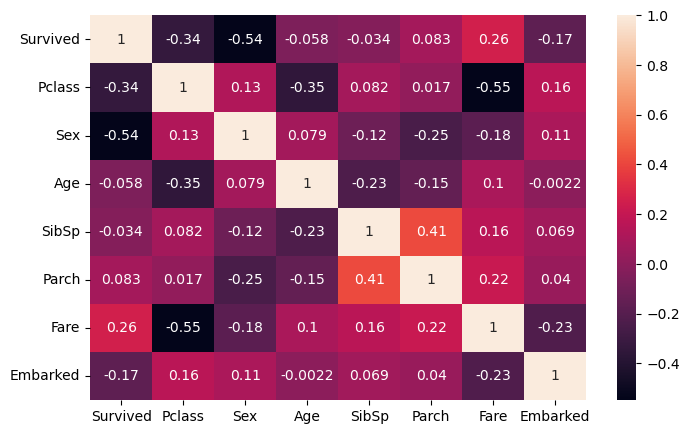

In [28]:
import seaborn as sn
plt.figure(figsize = (8,5))
sn.heatmap(df_res.corr(), annot=True)

In [29]:
df_final = df_res[['Pclass', 'Sex', 'Fare']]

In [30]:
df_final.head()

,Pclass,Sex,Fare
0,3,1,7.2500
1,1,0,71.2833
2,3,0,7.9250
3,1,0,53.1000
4,3,1,8.0500


In [31]:
df_final.describe()

,Pclass,Sex,Fare
count,889.000000,889.000000,889.000000
mean,2.311586,0.649044,32.096681
std,0.834700,0.477538,49.697504
min,1.000000,0.000000,0.000000
25%,2.000000,0.000000,7.895800
50%,3.000000,1.000000,14.454200
75%,3.000000,1.000000,31.000000
max,3.000000,1.000000,512.329200


In [32]:
X = df_final
y = df_res.Survived

## Splitting the data

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [34]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

In [35]:
X_test = sc.transform(X_test)

In [36]:
X_train

array([[-1.59818359, -1.37682685,  2.55976732],
       [-0.38864919,  0.72630774, -0.11727423],
       [ 0.82088521, -1.37682685, -0.30812424],
       ...,
       [-1.59818359,  0.72630774, -0.04016311],
       [ 0.82088521,  0.72630774, -0.4690937 ],
       [-0.38864919,  0.72630774,  0.18305814]])

In [37]:
#model selection
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [38]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [39]:
model.score(X_test, y_test)

0.7892376681614349

In [40]:
#model accuracy

In [41]:
from sklearn.metrics import accuracy_score # work with the ouput data

In [42]:
y_pred = model.predict(X_test)

In [43]:
accuracy_score(y_test, y_pred)

0.7892376681614349

## draw the graph for DT

In [44]:
from sklearn.tree import plot_tree

[Text(0.3797752808988764, 0.975, 'x[1] <= -0.325\ngini = 0.468\nsamples = 666\nvalue = [417, 249]'),
 Text(0.19634831460674157, 0.925, 'x[0] <= 0.216\ngini = 0.381\nsamples = 230\nvalue = [59, 171]'),
 Text(0.0898876404494382, 0.875, 'x[2] <= -0.062\ngini = 0.104\nsamples = 127\nvalue = [7, 120]'),
 Text(0.07191011235955057, 0.825, 'x[2] <= -0.074\ngini = 0.194\nsamples = 55\nvalue = [6, 49]'),
 Text(0.06292134831460675, 0.775, 'x[2] <= -0.194\ngini = 0.168\nsamples = 54\nvalue = [5, 49]'),
 Text(0.0449438202247191, 0.725, 'x[2] <= -0.228\ngini = 0.231\nsamples = 30\nvalue = [4, 26]'),
 Text(0.035955056179775284, 0.675, 'x[2] <= -0.363\ngini = 0.191\nsamples = 28\nvalue = [3, 25]'),
 Text(0.02696629213483146, 0.625, 'x[2] <= -0.371\ngini = 0.255\nsamples = 20\nvalue = [3, 17]'),
 Text(0.017977528089887642, 0.575, 'x[2] <= -0.402\ngini = 0.153\nsamples = 12\nvalue = [1, 11]'),
 Text(0.008988764044943821, 0.525, 'gini = 0.219\nsamples = 8\nvalue = [1, 7]'),
 Text(0.02696629213483146, 0.5

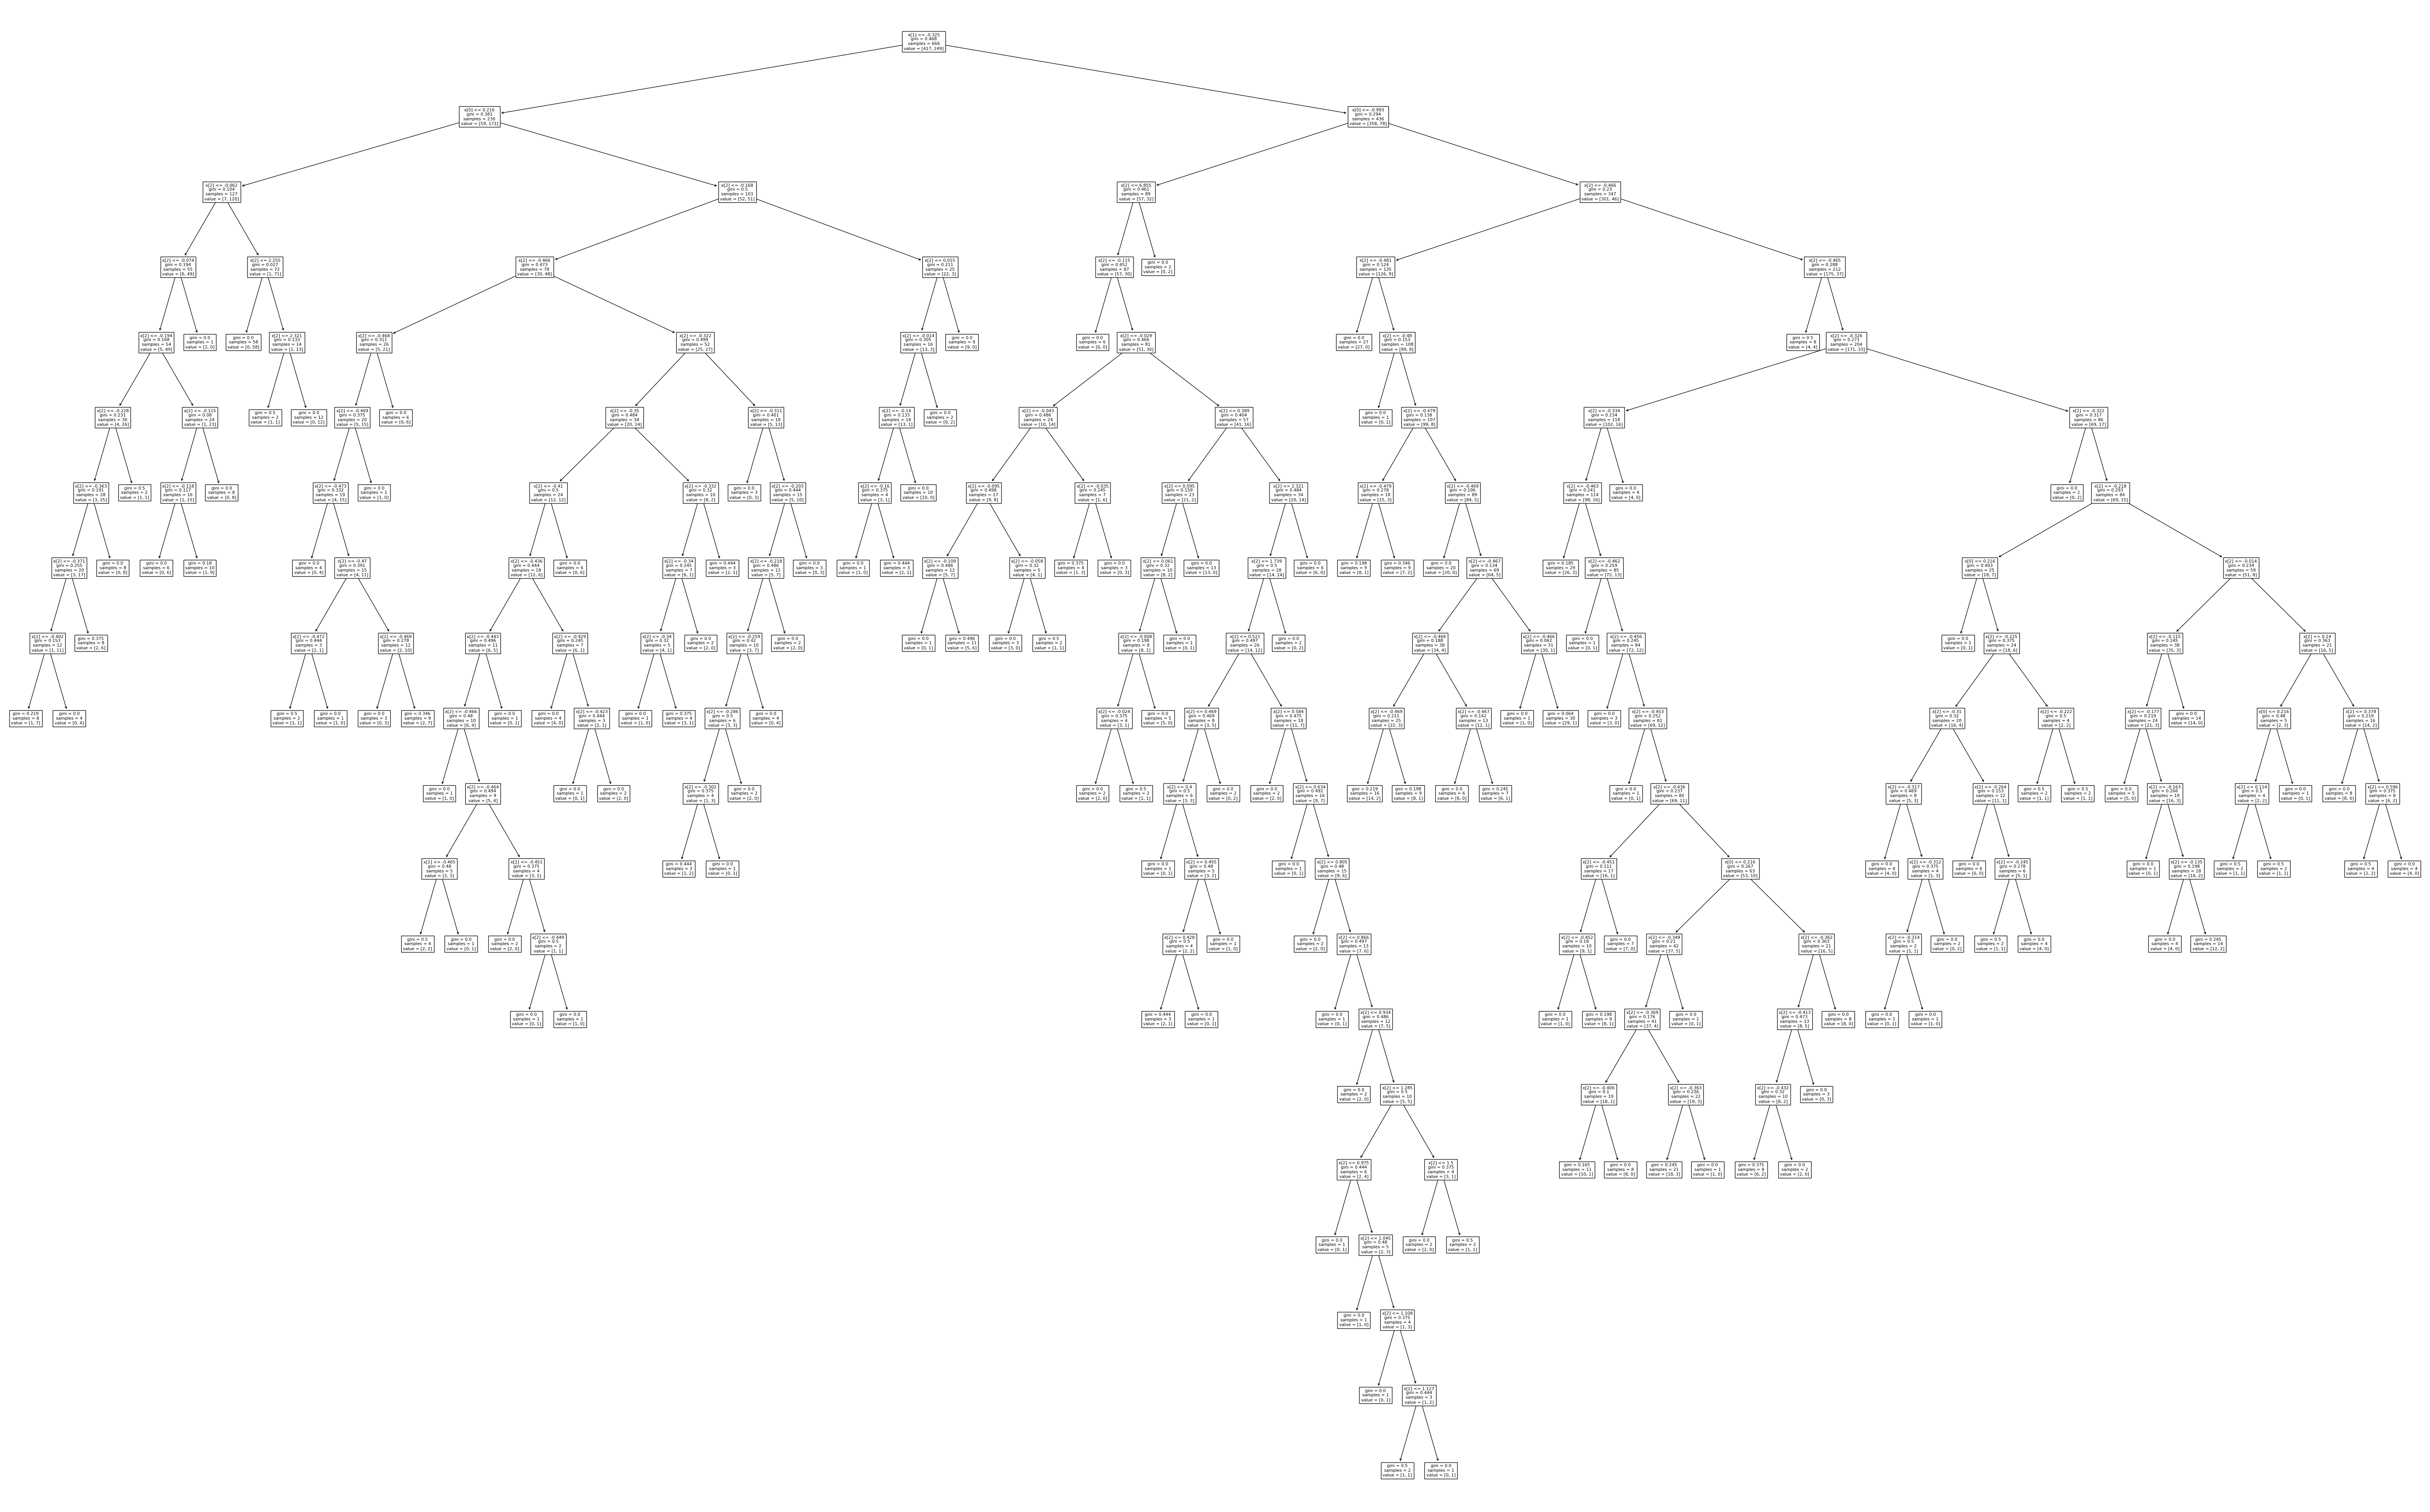

In [45]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 80, 50
plot_tree(model)

### hyper parameter tuning

In [46]:

#model selection
from sklearn import tree
model = tree.DecisionTreeClassifier(max_depth=5)

model.fit(X_train, y_train)

model.score(X_test, y_test)

0.7847533632286996

In [47]:
# ploting the tree

[Text(0.5520833333333334, 0.9166666666666666, 'Sex <= -0.325\ngini = 0.468\nsamples = 666\nvalue = [417, 249]\nclass = 0'),
 Text(0.3125, 0.75, 'Pclass <= 0.216\ngini = 0.381\nsamples = 230\nvalue = [59, 171]\nclass = 1'),
 Text(0.1388888888888889, 0.5833333333333334, 'Fare <= -0.062\ngini = 0.104\nsamples = 127\nvalue = [7, 120]\nclass = 1'),
 Text(0.08333333333333333, 0.4166666666666667, 'Fare <= -0.074\ngini = 0.194\nsamples = 55\nvalue = [6, 49]\nclass = 1'),
 Text(0.05555555555555555, 0.25, 'Fare <= -0.194\ngini = 0.168\nsamples = 54\nvalue = [5, 49]\nclass = 1'),
 Text(0.027777777777777776, 0.08333333333333333, 'gini = 0.231\nsamples = 30\nvalue = [4, 26]\nclass = 1'),
 Text(0.08333333333333333, 0.08333333333333333, 'gini = 0.08\nsamples = 24\nvalue = [1, 23]\nclass = 1'),
 Text(0.1111111111111111, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = 0'),
 Text(0.19444444444444445, 0.4166666666666667, 'Fare <= 2.255\ngini = 0.027\nsamples = 72\nvalue = [1, 71]\nclass = 1'),
 T

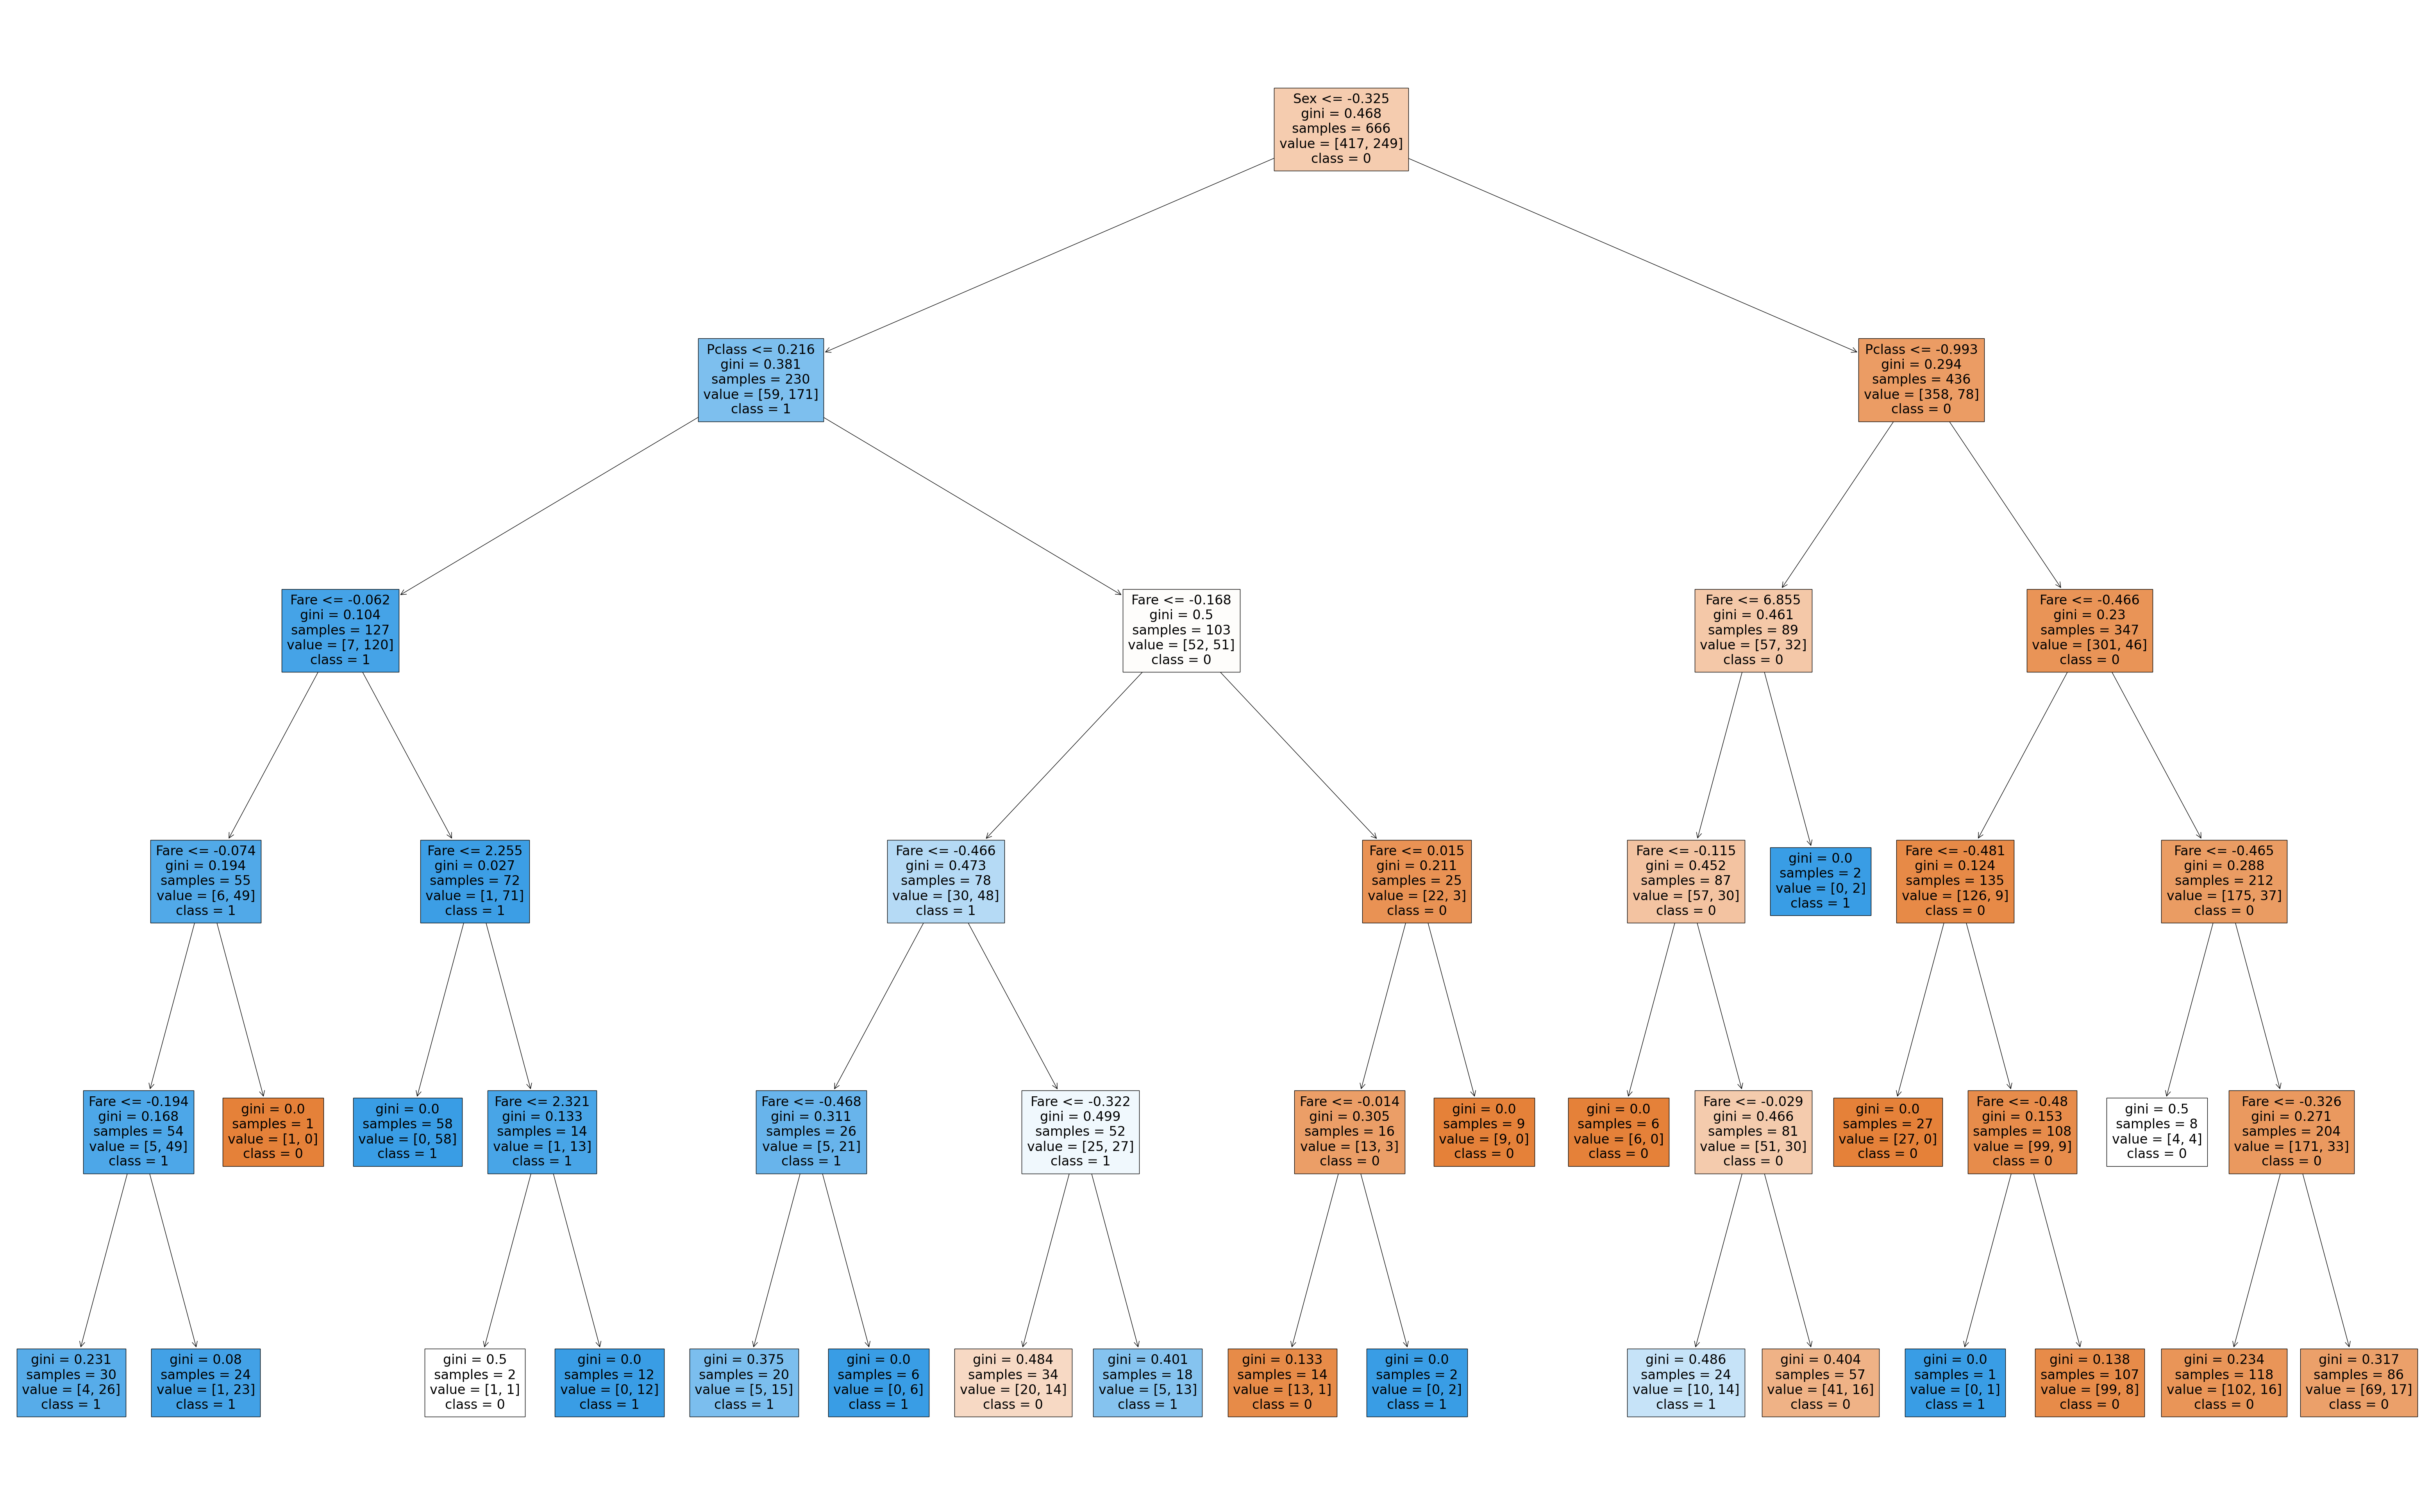

In [48]:
plot_tree(model,feature_names=['Pclass','Sex','Fare'],class_names=['0','1'],filled=True)

In [70]:
# hyper parameter tuning

param_grid = {
    'max_depth':[2,4,8,10,None],
     'criterion':['gini', 'entropy'],
    'min_samples_split':[0.25,0.5,1.0],
    'max_features' : [1, 2, 3]
}

In [71]:
# help(tree.DecisionTreeClassifier)

In [72]:
from sklearn.model_selection import GridSearchCV

reg = GridSearchCV(tree.DecisionTreeClassifier(),param_grid=param_grid)

In [73]:
reg.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 8, 10, None],
                         'max_features': [1, 2, 3],
                         'min_samples_split': [0.25, 0.5, 1.0]})

In [74]:
reg.best_score_

0.7958366064414768

In [75]:
reg.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'max_features': 2,
 'min_samples_split': 0.25}

# Key points
Decision tree worked in nested if else construct

divide the 2-d plain with straight line

divide the co-ordinate sytem with hyperplain into sub-cubiod

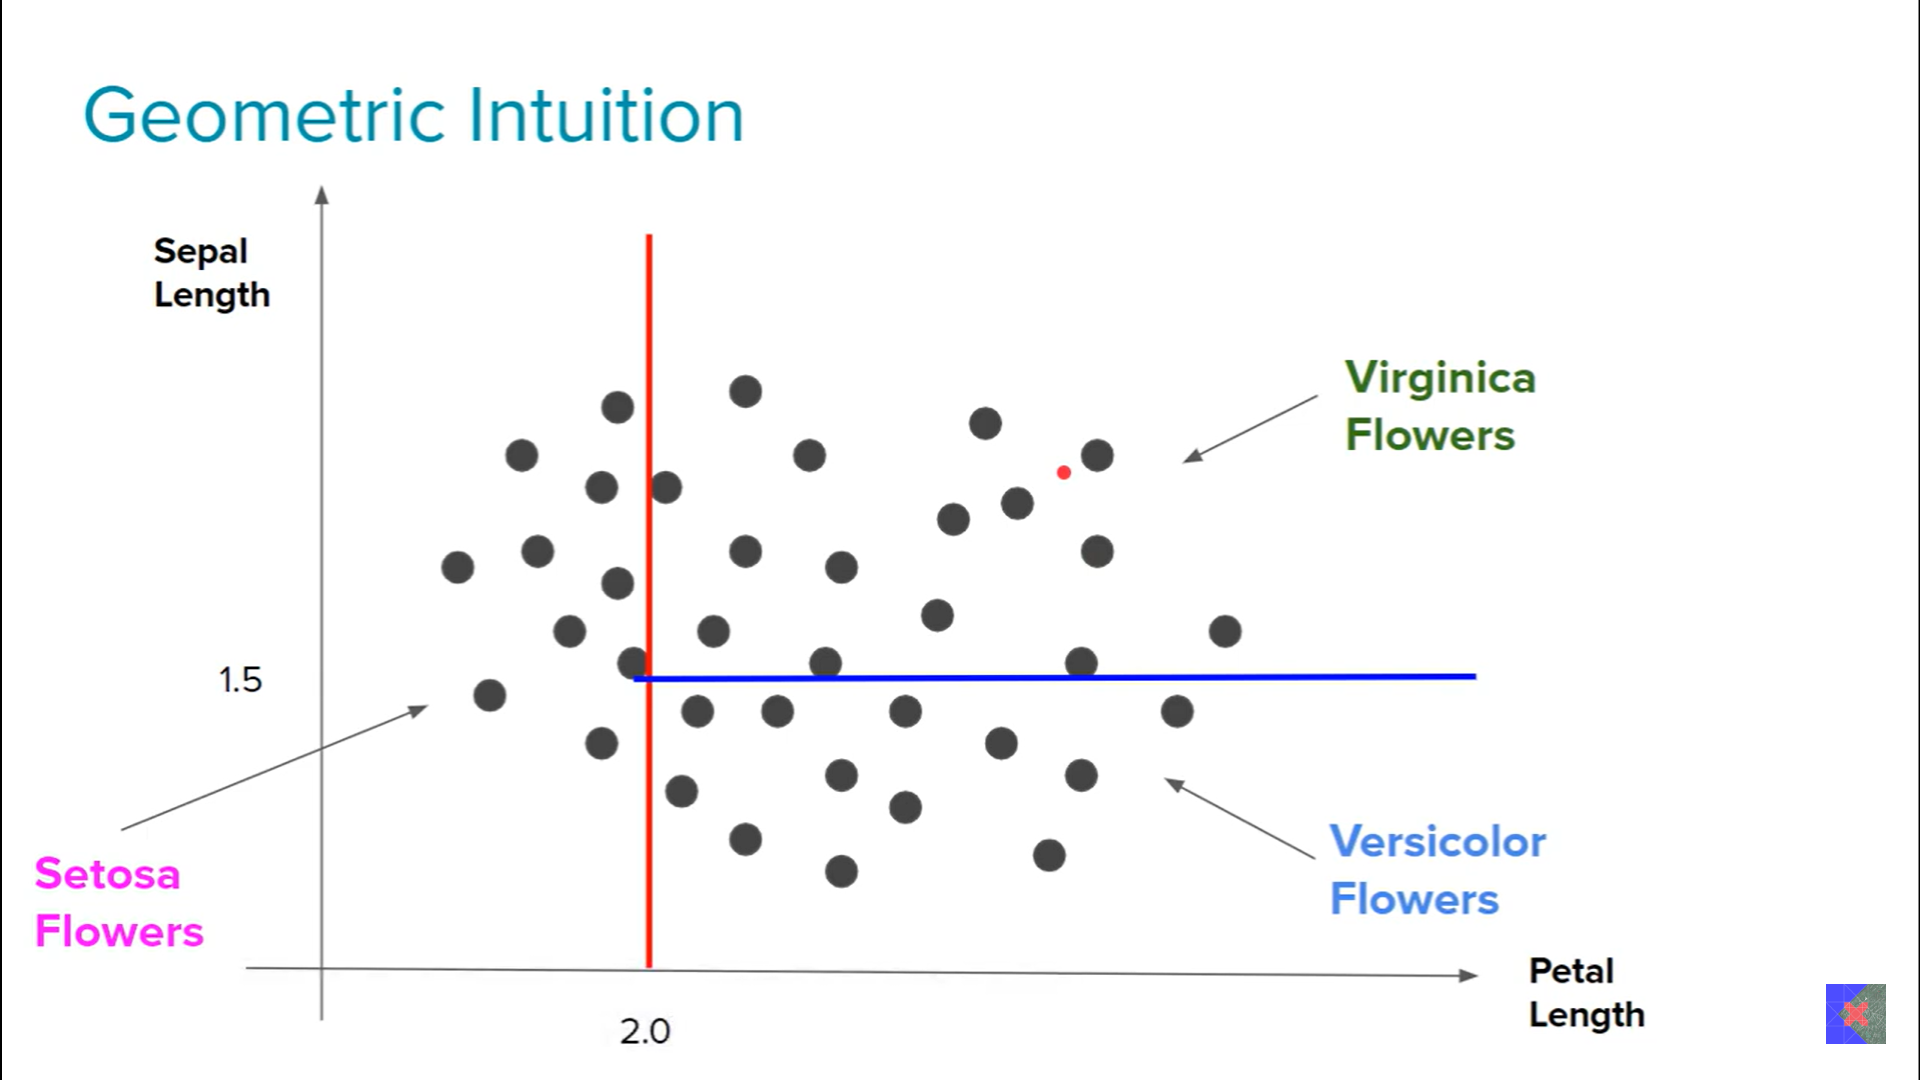


  Parameters:​


  Tree Nodes: Represent the decision points and are derived from the dataset features.
  

  Branches: Are outcomes of splits and help in making predictions.
  

  Leaf Nodes: The final output nodes that give prediction after training.
  

​

Hyperparameters:


​

 Max Depth: The maximum depth of the tree. Limiting depth can prevent overfitting.
 

 Min Samples Split: The minimum number of samples required to split an internal node.
 

 Min Samples Leaf: The minimum number of samples required to be at a leaf node.
 

 Max Features: The number of features to consider when looking for the best split.
 

 Criterion: The function to measure the quality of a split. "Gini" for the Gini impurity and "entropy" for the information gain
 



**Gini Impurity**

This Gini Impurity value indicates the impurity or mixedness of the node. A value closer to 0 indicates a pure node, while a value closer to 0.5 indicates a more impure node. 

**G = 1 - Σp(i)^2**

**entropy**

Entropy is a measure of disorder, randomness, or uncertainty.

 S = -k * ∑ p_i * ln(p_i)
 
where S is the entropy, k is the Boltzmann constant, p_i are the probabilities of each